In [2]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from numpy import dtype
# !netstat -ano | findstr :8888 # 查看8888端口被哪个进程占用
# !jupyter server list # 查看当前jupyter server列表
# !Remove-Item "$env:APPDATA\jupyter\runtime\jpserver-*.json" -Force # 手动删掉 runtime 目录下的所有 json, 防止端口冲突

# NumPy基础
*NumPy是Python中进行科学计算的基础包，提供了强大的多维数组对象和各种操作数组的函数。*

In [ ]:
# 创建数组
print(np.array([[1, 2, 3], [4, 5, 6]]))  # 直接创建二维数组
print(np.empty((2, 2), dtype=np.float64))  # 创建未初始化的数组
print(np.full((3, 4), 7, dtype=np.float64))  # 创建所有元素为7的数组
print(np.zeros((3, 4), dtype=np.float64))  # 创建全零数组
print(np.ones((3, 4), dtype=np.float64))  # 创建全一数组
print(np.empty((3, 4), dtype=np.float64))  # 创建未初始化的数组
# 注意 ones_like/zeros_like/full_like 需要传入数组而不是shape
print(np.ones_like(np.zeros((3, 4)), dtype=np.float64))  # 创建与给定数组形状相同的全一数组
print(np.zeros_like(np.ones((3, 4)), dtype=np.float64))  # 创建与给定数组形状相同的全零数组
print(np.full_like(np.ones((3, 4)), 6, dtype=np.float64))  # 创建与给定数组形状相同的全6数组

In [ ]:
# 随机数
print(random.randint(1, 100))  # 生成1到100之间的随机整数
print(random.uniform(1, 100))  # 生成1到100之间的随机浮点数
print(np.random.randint(1, 100, (3, 4)))  # 生成3x4的随机整数数组
print(np.random.uniform(1, 100, (3, 4)))  # 生成3x4的随机浮点数组
print(np.random.randn(3, 4))  # 生成标准正态分布的数组
print(np.random.rand(3, 4))  # 生成0-1均匀分布的数组
print(random.randbytes(1))  # 生成1字节的随机字节

In [ ]:
# 固定随机种子
np.random.seed(1)
print(np.random.rand(3, 4))
print(np.random.rand(3, 4))

In [ ]:
# 索引和切片
arr = np.random.randint(0, 5, (1, 10))
print(arr[0, 5])  # 访问第1行第6列
print(arr[:, 2:8:2])  # 切片：第1行，第3到第8列，步长2
print(arr)
print((arr>2).reshape(-1))  # 布尔判断并拉平成一维
print(type(arr>2))  # 布尔数组类型
print(arr[arr>2])  # 布尔索引，筛选大于2的元素
print(arr[0,[0,3,4]])  # 按索引列表取元素

# 常用切片和变形例子
arr3 = np.arange(12).reshape(3,4)
print(arr3[1])  # 取第2行
print(arr3[:,2])  # 取第3列
print(arr3[1:3,1:3])  # 取第2-3行，第2-3列
print(arr3.flatten())  # 拉平成一维
print(arr3.T)  # 转置

In [ ]:
# 拼接与分割
a = np.array([[1,2],[3,4]])
b = np.array([[5,6],[7,8]])
print(np.concatenate([a, b], axis=0))  # 按行拼接, 默认axis=0
print(np.concatenate([a, b], axis=1))  # 按列拼接
print(np.vstack([a, b]))  # 垂直拼接
print(np.hstack([a, b]))  # 水平拼接
print(type(np.split(a, 2, axis=1)))  # 按列分割返回list
print(np.split(a, 2, axis=1))  # 按列分割
print(np.split(a, 2, axis=0))  # 按行分割

In [ ]:
# 排序与去重与计数
arr = np.array([3, 1, 2, 2, 5, 0])
print(np.sort(arr))  # 排序
print(np.argsort(arr)) # 返回排序后元素在原数组中的索引
arr1 ,index, count = np.unique(arr, return_index=True, return_counts=True)  # 去重并且自动排序，return_index=True会返回去重后元素在原数组中的索引
print(arr1, index, count) # 去重后的数组，去重后元素在原数组中的索引，去重后元素在原数组中出现的次数
print(np.count_nonzero(arr))

In [ ]:
# 逐元素运算
arr1 = np.random.randint(0, 5, (3, 3))
arr2 = np.random.randint(1, 5, (3, 3))
print(arr1 + arr2)  # 加法
print(arr1 - arr2)  # 减法
print(arr1 * arr2)  # 乘法
print(arr1 / arr2)  # 除法
print(arr1 // arr2)  # 整除
print(arr1 ** arr2)  # 幂运算
print(arr1 % arr2)  # 取余
print(np.sqrt(arr1))  # 开方
print(np.exp(arr1))  # 指数
print(np.log(arr1+1))  # 对数（加1防止log(0)）

arr1 = np.random.randint(0, 5, (3, 4))
arr2 = np.random.randint(0, 5, (3, 4))
print(arr1 @ arr2.T)  # 矩阵乘法
print(np.dot(arr1, arr2.T))  # 矩阵乘法

In [ ]:
# 广播的机制是相同维度上的长度相同，或者其中一个维度的长度为1
print(np.array([1,2,3])+np.array([[4],[5],[6]]))

In [ ]:
# 检测缺失值
print(np.isnan(np.array([1,2,3])))
print(np.isnan(np.array([1,np.nan,3])))

In [ ]:
arr = np.random.randint(0, 100, (3, 4))   # 3 行 4 列
print("原数组:\n", arr)

# 统计函数，ndarray类型有很多统计方法，也可以使用 numpy 模块的同名函数
# axis=0 → 跨行 → 对列做统计 → 得到“每列一个数”
# axis=1 → 跨列 → 对行做统计 → 得到“每行一个数”
# 想保留维度再加 keepdims=True，后续广播不会变形。

# 按列统计（沿行方向压缩，axis=0）
print("每列均值:", arr.mean(axis=0))   # 长度 4 的数组
print("每列求和:", arr.sum(axis=0))

# 按行统计（沿列方向压缩，axis=1）
print("每行中位数:", np.median(arr, axis=1))  # 长度 3 的数组
print("每行最大值:", arr.max(axis=1))
print("每行最小值:", arr.min(axis=1))
print("每行最大值的索引:", arr.argmax(axis=1))  # 返回索引
print("每行最小值的索引:", arr.argmin(axis=1))  # 返回索引

# 同时指定维度 + 保持维度（可选）
print("每列标准差（保持二维）:", arr.std(axis=0, keepdims=True))  # shape(1,4)
print("每行方差:", arr.var(axis=1))

In [ ]:
# where函数
arr = np.random.randint(0, 100, (3, 4))
print("原数组:\n", arr)
print(np.where(arr>50, arr, 0))  # 条件满足时取第2个参数，否则取第3个参数

# Pandas基础
 *Pandas是Python中用于数据分析和处理的强大库，提供了高效的数据结构和数据操作工具。*

## series
*Series是一种类似于一维数组的对象，可以存储各种数据类型，并且带有标签（索引）。*

In [ ]:
# 创建Series
ser = pd.Series([1, 2, 3, 4, 5])  # 创建一个整数类型的Pandas数组
print(ser)
ser = pd.Series([1.0, 2.0, 3.0], index=['a', 'b', 'c'], name='test')  # 创建一个浮点类型的Pandas数组，并指定索引和名称
print(ser)
# 用字典创建Series
ser = pd.Series({'a': 1, 'b': 2, 'c': 3})  # 用字典创建Series，类型需要一致，不一致时会自动转换为更高级的类型
print(ser)
ser

In [ ]:
# Series属性
ser = pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'], name='test')
print(ser.index)  # 索引
print(ser.values)  # 值
print(ser.dtype)  # 数据类型
print(ser.shape)  # 形状
print(ser.size)  # 元素个数
print(ser.ndim)  # 维度
print(ser.name)  # 名称

In [ ]:
# Series访问数据
ser = pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'], name='test')
print(ser['a'])  # 通过索引访问单个元素，返回单个元素
print(ser[['a', 'c']])  # 通过索引列表访问多个元素，返回Series
print(ser>2)  # 布尔索引，筛选大于1的元素
print(ser[ser > 2])  # 布尔索引，筛选大于1的元素

print(ser.loc[['a', 'c']])  # 显式索引，按标签索引，返回Series，支持切片
print(ser.iloc[0:3])  # 隐式索引，按位置索引，返回Series，支持切片
print(ser.at['a'])  # 显式索引，按标签索引，返回单个元素
print(ser.iat[0])  # 隐式索引，按位置索

In [ ]:
# Series常用方法
ser = pd.Series([1, 2, 3, np.nan, None, 4, 5], index=['a', 'b', 'c', 'd', 'e', 'f', 'g'], name='test')
print(ser.head(2))  # 返回前n个元素，默认n=5
print(ser.tail(2))  # 返回后n个元素，默认n=5

print(ser.keys()) # 返回索引
print(ser.astype(np.float64))  # 返回一个新的Series，转换数据类型

print(ser.describe())  # 返回描述性统计信息，包括计数、均值、标准差、最小值、四分位数和最大值
print(ser.count())  # 返回非缺失值的数量
print(ser.sum())  # 返回元素的和
print(ser.mean())  # 返回元素的均值
print(ser.var())  # 返回元素的方差
print(ser.std())  # 返回元素的标准差
print(ser.median())  # 返回元素的中位数
print(ser.mode())  # 返回元素的众数
print(ser.min())  # 返回元素的最小值
print(ser.max())  # 返回元素的最大值
print(ser.idxmin())  # 返回最小值的索引
print(ser.idxmax())  # 返回最大值的索引
print(ser.nlargest(3)) # 返回前n个最大值，默认n=5
print(ser.nsmallest(3)) # 返回前n个最小值，默认n=5

print(ser.nunique()) # 返回唯一值的数量
print(ser.unique())  # 去重
print(ser.value_counts())  # 返回唯一值的计数

print(ser.isnull())  # 返回布尔数组，表示元素是否为缺失值
print(ser.notnull())  # 返回布尔数组，表示元素是否为非缺失值
print(ser.isna())  # 返回布尔数组，表示元素是否为缺失值
print(ser.notna())  # 返回布尔数组，表示元素是否为非缺失值

print(ser.isin([1, 2]))  # 返回布尔数组，表示元素是否在给定列表中

print(ser.sort_values())  # 返回一个新的Series，按值排序
print(ser.sort_index())  # 返回一个新的Series，按索引排序

print(ser.dropna())  # 返回一个新的Series，删除缺失值
print(ser.drop_duplicates()) # 返回一个新的Series，删除重复值
print(ser.fillna(0))  # 返回一个新的Series，填充缺失值为指定值

print(ser.diff().abs())  # 返回一个新的Series，计算相邻元素的差值, 取绝对值
print(ser.pct_change())  # 返回一个新的Series，计算相邻元素的百分比变化(百分比变化=(当前值-前一个值)/前一个值)
print(ser.cumsum())  # 返回一个新的Series，计算累积和
print(ser.cumprod())  # 返回一个新的Series，计算累积积
print(ser.cummax())  # 返回一个新的Series，计算累积最大值
print(ser.cummin())  # 返回一个新的Series，计算累积最小

In [ ]:
# 日期时间序列
data = pd.date_range(start='2023-01-01', periods=12, freq='MS')  # 生成日期范围，频率为每月月初 # 访问日期的某个属性
print(data.day>3)
series = pd.Series(np.random.randint(10, 20, 12), index=data) # 创建一个以日期为索引的Series
print(series.resample('QS').mean())  # 按季度重采样，取均值
print(series.rolling(window=3).mean())  # 滚动窗口，窗口大小为3，取均值
# print(series.resample('M').mean())  # 按月重采样，取均值
# print(series.resample('W').mean())  # 按周重采样，取均值
# print(series.resample('D').mean())  # 按天重
date_rng = pd.date_range(start='2023-01-01', end='2023-01-10', freq='D')  # 生成日期范围，频率为每天
print(date_rng)
ser = pd.Series(np.random.randint(0, 100, len(date_rng)), index=date_rng, name='test')  # 创建一个以日期为索引的Series
print(ser)
print(ser['2023-01-03'])  # 通过日期索引访问
print(ser['2023-01'])  # 通过月份索引访问
print(ser['2023'])  # 通过年份索引访问
print(ser['2023-01-03':'2023-01-06'])  # 通过日期范围切片访问
ser

## DataFrame
*DataFrame是一个二维表格数据结构，其每一列就是一个series，类似于电子表格或SQL表格，可以存储不同类型的数据，并且带有行索引和列标签。*

In [ ]:
# 用字典创建一个学生的DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank'],
    'ID': [1001, 1002, 1003, 1004, 1005, 1006],
    'Score': [85.5, 90.0, 78.5, 90.0, 88.0, 76.5],
    'Age': [24, 27, 22, 32, 29, 23],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia']
}
df = pd.DataFrame(data, index=['a', 'b', 'c', 'd', 'e', 'f'])  # 创建DataFrame，并指定行索引
df

In [ ]:
# DataFrame属性
print(df.index)  # 行索引
print(df.columns)  # 列标签
print(df.values)  # 值
print(df.dtypes)  # 每列的数据类型
print(df.shape)  # 形状
print(df.size)  # 元素个数
print(df.ndim)  # 维度
print(df.info())  # 数据概览

In [ ]:
# 行列转置
print(df.T)  # 转置
df.T

In [ ]:
# DataFrame访问数据
print(df.Name)  # 通过列标签访问单列，返回Series
print('-'*50)
print(df['Name'])  # 通过列标签访问单列，返回Series
print('-'*50)
print(df[['Name', 'Age']])  # 通过列标签列表访问多列，返回DataFrame
print('-'*50)
print(df.loc['a'])  # 显式索引，按标签索引单行，返回Series
print('-'*50)
print(df.loc['a':'c', 'Name'])  # 显式索引，按标签索引多行一列，返回DataFrame，支持切片
print('-'*50)
print(df.loc[['a', 'c']])  # 显式索引，按标签索引多行，返回DataFrame
print('-'*50)
print(df.iloc[0])  # 隐式索引，按位置索引单行，返回Series
print('-'*50)
print(df.iloc[0:2, 0])  # 隐式索引，按位置索引多行，返回DataFrame
print('-'*50)
print(df.at['a', 'Name']) # 显式索引，按标签索引单个元素，返回单个值
print('-'*50)
print(df.iat[0, 1]) # 隐式索引，按位置索引单个元素，返回单个值

In [ ]:
print(df.head(3)) # 返回前n行，默认n=5
print('-'*50)
print(df.tail(2)) # 返回后n行，默认n=5
print('-'*50)
print(df.sample(2)) # 随机返回n行，默认n=1

In [ ]:
# boolean索引
print(df[df.Age > 25])  # 布尔索引，筛选Age大于25的行
print('-'*50)
print(df[(df.Score >= 85) & (df.Age < 25)])  # 布尔索引，筛选Score大于等于85的行
print('-'*50)
print(df[df.Name.isin(['Alice', 'Bob'])]) # 布尔索引，筛选Name在给定列表中的行

In [ ]:
# DataFrame常用方法
print(df.isin({'Name': ['Alice', 'Bob'], 'Age': [22, 23]}))  # 返回布尔DataFrame，表示元素是否在给定字典中
print('-'*50)
print(df.sort_values(['Score', 'Age'], ascending=[False, True]))  # 返回一个新的DataFrame，按顺序多列排序（第一列相等，再比第二列），可分别指定升降序
print('-'*50)
print(df.nlargest(3, ['Score', 'Age']))  # 返回指定列前n个最大值的行并排序，默认n=5，若第一列相等，再找指定的第二列
print('-'*50)
# 统计函数，DataFrame类型有很多统计方法，也可以使用 pandas 模块的同名函数，对每一列的数据进行统计和对series的操作是一样的
print(df.Age.mean())  # 返回Age列的均值
print('-'*50)
print(df.describe())  # 返回描述性统计信息
print('-'*50)
print(df.isnull().sum()) # 返回每列缺失值的数量
print('-'*50)
print(df.notnull().sum()) # 返回每列非缺失值的数量
print('-'*50)
print(df.isna()) # 返回布尔DataFrame，表示元素是否为缺失值
print('-'*50)
print(df.notna()) # 返回布尔DataFrame，表示元素是否为非缺失值
print('-'*50)
print(df.dropna())  # 返回一个新的DataFrame，删除含有缺失值的行
print('-'*50)

## 数据的导入与导出
*Pandas支持多种数据格式的导入和导出，包括CSV、Excel、JSON等。*

In [ ]:
# CSV文件
df = pd.read_csv('data/employees.csv')  # 读取CSV文件
print(type(df))  # 查看类型
print(df.salary.mean())  # 计算salary列的均值
# 数据的导出
df_head = df.head()  # 获取最后几行
df_head.to_csv('data/employees_head.csv', index=False)  # 导出为CSV文件
df_head

In [ ]:
# JSON文件
df = pd.read_json('data/data1.json')  # 读取JSON文件
print(type(df))  # 查看类型
print(df)

import json
with open('data/data2.json', 'w+') as fp:
    json.dump(df_head.to_dict(orient='records'), fp)  # 导出为JSON文件

with open('data/test.json') as f:
    data = json.load(f)  # 使用json模块读取JSON文件
print(type(data))  # 查看类型

df = pd.DataFrame(data['users'])  # 将JSON数据转换为DataFrame
print(type(df))  # 查看类型
df

In [ ]:
# 数据清洗，查看和删除缺失值
# nan:not a number
s = pd.Series([12, 25, np.nan, None, pd.NA])
df = pd.DataFrame([[1, pd.NA, 2], [2, 3, 5], [None, 4, 6]], columns=['第1列', '第2列', '第3列'])
# 查看是否是缺失值
print(s.isna())
print(s.isnull())
print(df.isna())
print(df.isnull())

print(df.isna().sum(axis=1))  # 按行统计缺失值
print(s.isna().sum())  # 查看缺失值的个数
print(s.dropna()) # series删除缺失值
print('-'*30)
print(df.dropna()) # dataframe删除含有缺失值的行
print('-'*30)
print(df.dropna(how='all')) # 如果所有的值都是缺失值，删除这一行
print('-'*30)
print(df.dropna(thresh=2)) # 如果至少有n个值不是缺失值，就保留
print('-'*30)
print(df.dropna(axis=1)) # 剔除一整列
print('-'*30)
print(df.dropna(subset=['第1列'])) # 如果某列有缺失值，则删除缺失值这一行

In [ ]:
# 填充缺失值
df = pd.read_csv('data/weather_withna.csv')
print(df.tail())
print(df.isna().sum())  # 统计缺失值
print(df.fillna({'temp_max': 20, 'wind': 2.5}).tail())  # 使用字典来填充
# print(pd.DataFrame(df.fillna({'temp_max': 20, 'wind': 2.5}, inplace=True)).tail())  # 原地修改对象是NoneType，需要转为DataFrame
print('-'*30)
print(df.fillna(df[['temp_max', 'wind']].mean()).tail())  # 使用统计值来填充
print('-'*30)
print(df.ffill().tail())  # 用前面的相邻值填充
print('-'*30)
print(df.bfill().tail())  # 用后面的相邻值

In [ ]:
# 删除重复数据
data = {
    "name":['alice','alice','bob','alice','jack','bob'],
    "age":[26,25,30,25,35,30],
    'city':['NY','NY','LA','NY','SF','LA']
}
df = pd.DataFrame(data)
print(df)
print(df.drop_duplicated())  # 删除重复行，保留第一次出现的行
print('-'*30)
print(df.drop_duplicated(keep='last'))  # 删除重复行，保留最后一次出现的行
print('-'*30)
print(df.drop_duplicated(subset=['name'], keep='last'))  # 删除指定列重复的行
print('-'*30)
print(df.drop_duplicated(subset=['name','age']))  # 删除指定多列重复的行

In [ ]:
# 更改数据类型
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4.0, 5.5, 6.1],
    'C': ['7', '8', '9'],
    'D': ['2023-01-01', '2023-01-02', '2023-01-03']
})
print(df.dtypes)  # 查看数据类型
print('-'*30)
df['A'] = df['A'].astype(np.int8)  # 更改为int8类型
print(df.dtypes)
print('-'*30)
df = df.astype({'A': np.float64, 'B': np.int32, 'C': np.float64})  # 更改指定列的数据类型
print(df.dtypes)
print('-'*30)
print(df['D'].astype('datetime64[ns]'))  # 更改为日期时间类型
print('-'*30)

In [ ]:
#数据变形
import pandas as pd
data = {
    'ID': [1, 2],
    'name':['alice','bob'],
    'Math': [90, 85],
    'English': [88, 92],
    'Science': [95, 89]
}
df = pd.DataFrame(data)
print(df)
df.T   #行列转置
# 宽表转换成长表
df2 = pd.melt(df,id_vars=['ID','name'],var_name='科目',value_name='分数')
df2.sort_values('name')
print(df2)
# 长表转宽表
pd.pivot(df2,index=['ID','name'],columns='科目',values='分数')

In [ ]:
# 分列
data = {
    'ID': [1, 2],
    'name':['alice smith','bob smith'],
    'Math': [90, 85],
    'English': [88, 92],
    'Science': [95, 89]
}
df = pd.DataFrame(data)

df[['first','last']]  = df['name'].str.split(" ",expand=True)  #expand=True返回多个列进行分列
df = pd.read_csv('data/sleep.csv')
df = df[['person_id','blood_pressure']]
df[['high','low']] = df['blood_pressure'].str.split('/',expand=True)
df['high']=df['high'].astype('int64')
df['low']=df['low'].astype('int64')
df.info()
df.high.mean()
df.low.mean()

In [ ]:
# 数据的离散化与分箱
df = pd.read_csv('data/employees.csv')
df1 = df.head(10)[['employee_id','salary']]
pd.cut(df1['salary'],bins=3) #bins=n，分成n段区间，起始值、结束值是所有数据的最小值、最大值
#4180~14100~24000
pd.cut(df1['salary'],bins=3).value_counts() # 每个区间的数量
pd.cut(df1['salary'],bins=[0,10000,20000,30000]) # bins=list，分成指定的n段区间，返回每个值所在的区间
pd.cut(df1['salary'],bins=[0,10000,20000,30000]).value_counts() # 每个区间的数量
df1['收入范围'] =pd.cut(df1['salary'],bins=[0,10000,20000,30000],labels=['低','中','高']) #bins=list，分成n段区间，返回每一区间的对应标签
pd.qcut(df1['salary'],3) # 等频分箱，分成n段区间，每个区间的数量大致相等

In [ ]:
df = pd.read_csv('data/sleep.csv')
df1 = df.head(10)[['person_id','sleep_quality']]
df['睡眠质量'] = pd.cut(df['sleep_quality'],bins=3,labels=
                         ['差','中','优'])
df['睡眠质量'].value_counts()
df.head(10)
df['gender']=df['gender'].astype('category')
df['gender'].value_counts()
# 字符串-->类别-->统计
# 数值-->分箱（类别）-->统计
print(df['gender'].dtype)
print(df['睡眠质量'].dtype)

In [ ]:
# df.rename()   df.set_index()  df.reset_index()
df = pd.DataFrame({
    'name':['jack','alice','tom','bob'],
    'age':[20,30,40,50],
    'gender':['female','male','female','male']
})
df.set_index("name",inplace=True)
df.reset_index(inplace=True)
df.rename(columns={"age":"年龄"},index={0:4})

In [ ]:
# 时间数据的处理
import pandas as pd
d = pd.Timestamp('2015-02-28 10:22')
d1 = pd.Timestamp('2015-02-28 13:22')
print(d)
print(type(d))
print("年：",d.year)
print("月：",d.month)
print("日：",d.day)
print(d.hour, d.minute, d.second)
print("季度：",d.quarter)
print("是否是月底：",d.is_month_end)
# 方法
print("星期几：",d.day_name())
print("转换为天：",d.to_period("D"))
print("转换为季度：",d1.to_period("Q"))
print("转换为年度：",d1.to_period("Y"))
print("转换为月度：",d1.to_period("M"))
print("转换为周维度：",d1.to_period("W"))

In [ ]:
# 字符串转换为日期类型
a = pd.to_datetime('20150228')
print(a)
print(type(a))
print(a.day_name())

# dataFrame 日期转换
df = pd.DataFrame({
    'sales':[100,200,300],
    'date':['20250601','20250602','20250603']
})
df['datetime'] = pd.to_datetime(df['date'])

print(df.info())
print(type(df['datetime']))
df['week']=df['datetime'].dt.day_name()
df['datetime'].dt.year

In [ ]:
# csv 日期转换
df = pd.read_csv('data/weather.csv',parse_dates=['date'])  # 读取csv时，指定某列为日期类型，自动解析
df.info()
df['date'].dt.day_name()

In [ ]:
# 日期数据作为索引可以切片操作取数据
df.set_index('date' , inplace=True)#设置原来的df的索引
print(df["2013-01":"2013-02"])

In [ ]:
# 分组聚合
# df.groupby('分组的字段')['聚合的字段'].聚合函数()
import pandas as pd
df = pd.read_csv('data/employees.csv')
df = df.dropna(subset=['department_id'])
df['department_id'] = df['department_id'].astype('int64')
# 计算不同部门的平均薪资
print(df.groupby('department_id').groups) #查看分组
df.groupby('department_id').get_group(20) #查看具体的某个分组数据
df2 = df.groupby('department_id')[['salary']].mean()
df2['salary'] = df2['salary'].round(2)
df2=df2.reset_index()
df2.sort_values('salary',ascending=False)

# 计算不同部门不同岗位的人的平均薪资
df2=df.groupby(['department_id','job_id'])[['salary']].mean()
df2=df2.reset_index()
df2['salary'] = df2['salary'].round(1)
df2.sort_values('salary',ascending=False)

# Matplotlib
*Matplotlib是Python中用于数据可视化的强大库，提供了丰富的绘图功能和灵活的图形定制选项。*

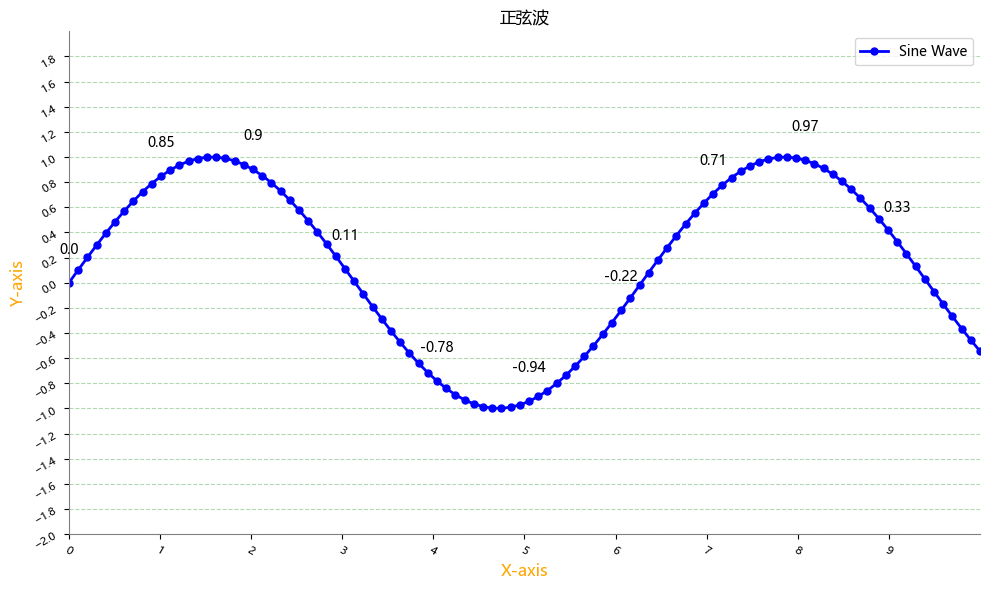

In [39]:
# 折线图
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
# 设置中文字体
rcParams['font.sans-serif'] = 'Microsoft YaHei'
# 'SimHei'	# 黑体（缺省就带，中文显示必用）
# 'Microsoft YaHei'	# 微软雅黑（Win7 起默认 UI 字体）
# 'SimSun'	# 宋体（老版本默认，衬线，可放在列表最后兜底）
# 'DengXian'	# 等线（Win10 起自带，无衬线）
# 'Microsoft JhengHei'	# 微软正黑（繁体中文）
# 'Segoe UI'    # Win10/11 系统界面西文字体，英文数字好看
# 完整“无衬线”西文/数字字体（也自带）
# 'Arial', 'Calibri', 'Tahoma', 'Verdana', 'Helvetica'（映射到 Arial）, 'DejaVu Sans'（Matplotlib 自带，缺省回退）

x = np.linspace(0, 10, 100)
y = np.sin(x)
# 设置画布大小
plt.figure(figsize=(10, 6))
# 绘制折线图，label表示图例，color表示颜色，linewidth表示线宽，linestyle表示线型，marker表示点的形状，markersize表示点的大小
plt.plot(x, y, label='Sine Wave', color='blue', linewidth=2, linestyle='-', marker='o', markersize=5)

plt.title('正弦波') # 标题
plt.xlabel('X-axis', color='orange', fontsize=12) # X轴标签
plt.ylabel('Y-axis', color='orange', fontsize=12) # Y轴标签
plt.xticks(np.arange(0, 10, 1), rotation=-30, fontsize=8) # 设置x轴刻度, rotation表示旋转角度, fontsize表示字体大小
plt.yticks(np.arange(-2, 2, 0.2), rotation=30, fontsize=8) # 设置y轴刻度, rotation表示旋转角度, fontsize表示字体大小
plt.xlim(0, 10) # 设置x轴范围
plt.ylim(-2, 2) # 设置y轴范围
# 消除右边和上边的边框，plt.gca()返回当前的坐标轴对象
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('gray') # 设置底部边框颜色
ax.spines['left'].set_color('gray') # 设置左边边框颜色
plt.legend(loc='best') # 显示label图例，loc指定位置
# plt.grid(True) # 添加网格
plt.grid(axis='y' , which='major', color='green', linestyle='--', alpha=0.3)  # 只显示y轴的网格，which='major'表示主刻度，alpha表示透明度

# 在每个数据点上显示数值
for i, (value_x, value_y) in enumerate(zip(x, y)):
    if i%10 == 0:  # 每隔10个点显示一个数值
        plt.text(value_x,value_y+0.2,str(value_y.round(2)), ha='center', va='bottom', fontsize=10) # ha表示垂直对齐，va表示水平对齐
# 自动优化排版
plt.tight_layout()
plt.show()

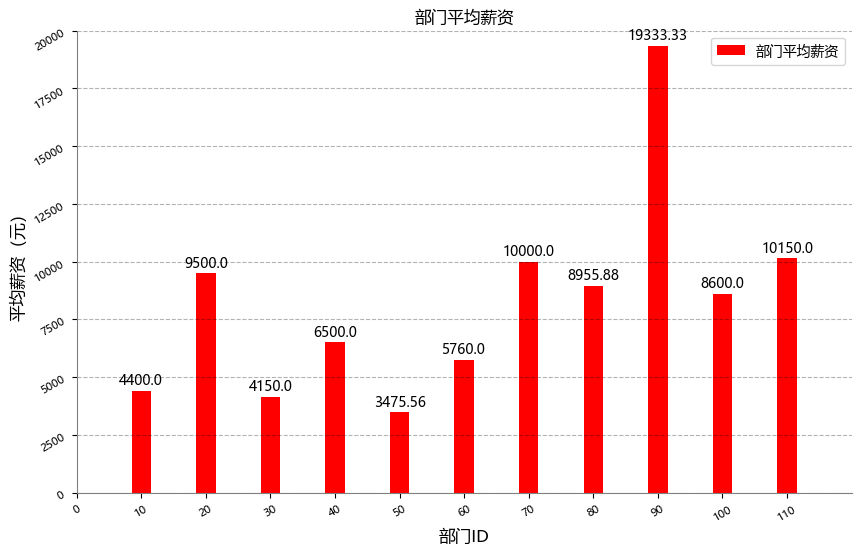

In [64]:
# 柱状图
df = pd.read_csv('./data/employees.csv')
dfdata = df.groupby(['department_id'])[['salary']].mean()
dfdata.reset_index(inplace=True)
department_ID = dfdata['department_id'].tolist()
mean_salary = dfdata['salary'].tolist()

plt.figure(figsize=(10, 6))
plt.bar(department_ID, mean_salary, label='部门平均薪资', width=3, color='red')

plt.title('部门平均薪资') # 标题
plt.xlabel('部门ID', color='black', fontsize=12) # X轴标签
plt.ylabel('平均薪资（元）', color='black', fontsize=12) # Y轴标签
plt.xticks(np.arange(0, 120, 10), rotation=30, fontsize=8) # rotation表示旋转角度, fontsize表示字体大小
plt.yticks(rotation=30, fontsize=8) # rotation表示旋转角度, fontsize表示字体大小
plt.xlim(0, 120) # 设置x轴范围
plt.ylim(0, 20000) # 设置y轴范围
# 消除右边和上边的边框，plt.gca()返回当前的坐标轴对象
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('gray') # 设置底部边框颜色
ax.spines['left'].set_color('gray') # 设置左边边框颜色
plt.legend(loc='best') # 显示label图例，loc指定位置
# plt.grid(True) # 添加网格
plt.grid(axis='y' , which='major', color='black', linestyle='--', alpha=0.3)  # 只显示y轴的网格，which='major'表示主刻度，alpha表示透明度

# 在每个数据点上显示数值
for i, (value_x, value_y) in enumerate(zip(department_ID, mean_salary)):
    plt.text(value_x, value_y+100, str(round(value_y, 2)), ha='center', va='bottom', fontsize=10)
plt.show()

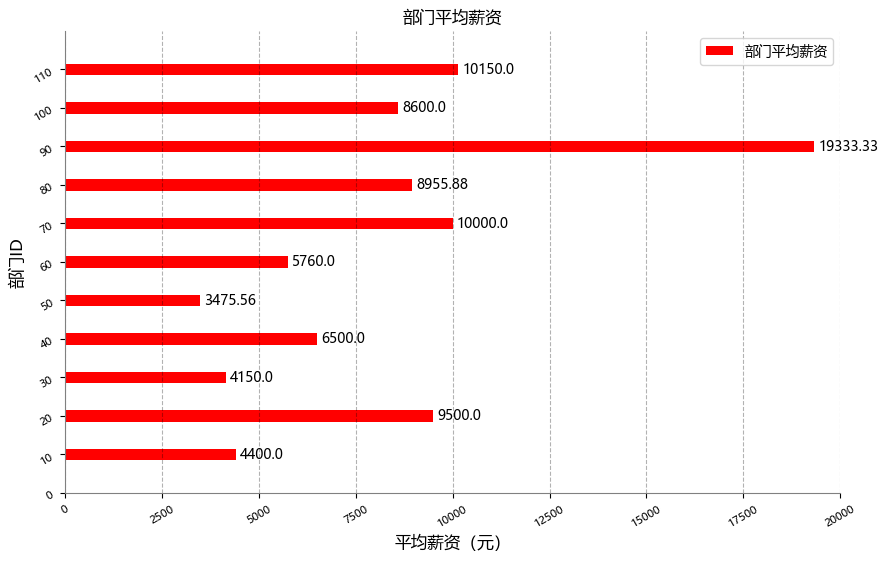

In [78]:
# 条形图
df = pd.read_csv('./data/employees.csv')
dfdata = df.groupby(['department_id'])[['salary']].mean()
dfdata.reset_index(inplace=True)
dfdata.sort_values('salary',ascending=True, inplace=True)

department_ID = dfdata['department_id'].tolist()
mean_salary = dfdata['salary'].tolist()

plt.figure(figsize=(10, 6))
plt.barh(department_ID, mean_salary, label='部门平均薪资', height=3, color='red')

plt.title('部门平均薪资') # 标题
plt.ylabel('部门ID', color='black', fontsize=12) # Y轴标签
plt.xlabel('平均薪资（元）', color='black', fontsize=12) # X轴标签
plt.yticks(np.arange(0, 120, 10), rotation=30, fontsize=8) # rotation表示旋转角度, fontsize表示字体大小
plt.xticks(rotation=30, fontsize=8) # rotation表示旋转角度, fontsize表示字体大小
plt.ylim(0, 120) # 设置y轴范围
plt.xlim(0, 20000) # 设置x轴范围
# 消除右边和上边的边框，plt.gca()返回当前的坐标轴对象
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('gray') # 设置底部边框颜色
ax.spines['left'].set_color('gray') # 设置左边边框颜色
plt.legend(loc='best') # 显示label图例，loc指定位置
# # plt.grid(True) # 添加网格
plt.grid(axis='x' , which='major', color='black', linestyle='--', alpha=0.3)  # 只显示y轴的网格，which='major'表示主刻度，alpha表示透明度

# 在每个数据点上显示数值
for i, (value_x, value_y) in enumerate(zip(mean_salary, department_ID)):
    plt.text(value_x+100, value_y, str(round(value_x, 2)), ha='left', va='center', fontsize=10)
plt.show()

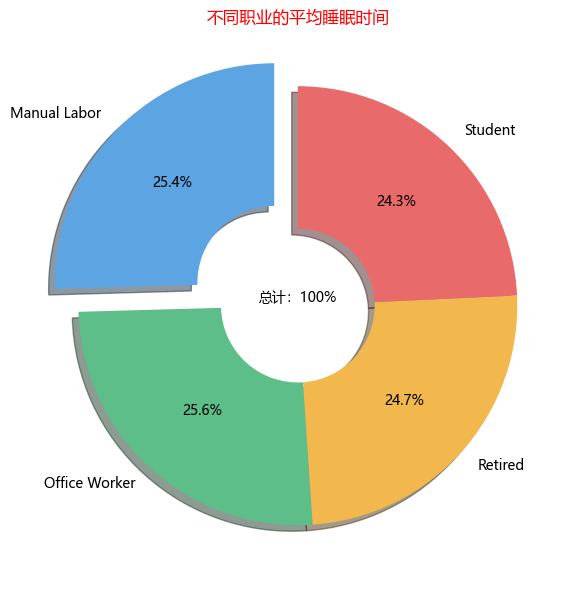

In [38]:
# 饼图
import matplotlib.pyplot as plt
from matplotlib import rcParams
# 设置中文字体
rcParams['font.sans-serif'] = 'Microsoft YaHei'

df = pd.read_csv('./data/sleep.csv')
df = df.groupby('occupation')[['sleep_duration']].mean()

df.reset_index(inplace=True)
occupation = df['occupation'].tolist()
sleep_duration = df['sleep_duration'].tolist()

# colors = ['#85C1E9', '#82E0AA', '#F8C471', '#F1948A'] # 配色，柔和糖果版（饱和度降低，护眼）
# colors = ['#7BA7BC', '#8CB89B', '#C9A87C', '#B08888', '#A37A9C'] # 莫兰迪灰阶版（高级灰调）
colors = ['#5DA5E2', '#5DBE8A', '#F2B84D', '#E86A6A', '#E86AC3'] # 深底亮字版（深色背景 PPT/海报）
explode = [0.15, 0, 0, 0]

plt.figure(figsize=(10, 6))
plt.pie(sleep_duration,
        labels=occupation,
        autopct='%.1f%%',  # 显示百分比
        startangle=90,  #调整初始画图的角度
        colors=colors,  # 设置饼图的配色
        wedgeprops={'width': 0.65},  #设置圆环的宽度
        pctdistance=0.65,  #设置百分比的位置
        explode=explode,
        shadow=True
        )
# 添加标题
plt.title('不同职业的平均睡眠时间', color='red',fontsize=12)
# 添加文本
plt.text(0,0,'总计：100%',ha='center',va='bottom',fontsize=10)
# 自动优化排版
plt.tight_layout()
plt.show()